In [1]:
import pyvista as pv
from Kirchhoffpy import lenspy
from Kirchhoffpy import Feedpy
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import torch as T
from Kirchhoffpy import coordinate,field_storage
from Kirchhoffpy.Vopy import CO,dotproduct,abs_v
c=299792458
mu=4*np.pi*10**(-7)
epsilon=8.854187817*10**(-12)
Z0=np.sqrt(mu/epsilon,dtype = np.float64)
p = pv.Plotter()
srffolder = 'srf/'


8


In [2]:
# 1. define frequnecy and wavelength
freq = 90*10**9
Lambda = c*1000/freq
k = 2*np.pi/Lambda
print(Lambda,k)


3.3310273111111113 1.8862605197565134


In [3]:
# 2. define coordinate systems
coord_ref = coordinate.coord_sys([0,0,0],[0,0,0],axes = 'xyz')

coord_L1 = coordinate.coord_sys([0,0,-(844.621988-4.34990822154231*10)],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)

coord_feed = coordinate.coord_sys([0,0,0],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)

coord_sky = coordinate.coord_sys([0,0,0],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)


In [4]:
Lens1 = -576.328027854936
Lens2 = -155.868066162269
Lens3 = -71.775901116741
Ref = 0.0
Lens1 = Lens1+ Lens2 +Lens3
print(Lens1)

-803.9719951339459


In [5]:
# 3. define input Feedhorn
feed= Feedpy.GaussiBeam(-8,8,
                        k,
                        coord_feed,
                        polarization = 'x')


7.787540624053921e+80


In [6]:
# 4. Lenses and aperture 
L1 = lenspy.simple_Lens(3.36,
                        4.34990822154231*10,# Thickness
                        44.3704085511817*10, # diameter
                        srffolder + 'plane1.rsf', 
                        srffolder + 'lens1_f1.rsf',
                        p,
                        coord_L1,
                        name = 'L1',
                        outputfolder = 'output/')
#L2 = lenspy.simple_Lens(2,46.9671 ,400, srffolder + 'lens2_f1.rsf', srffolder + 'lens2_f2.rsf',p,[0,0,-227.64396727901004],name = 'L2')
#L3 = lenspy.simple_Lens(2,29.6556 ,400, srffolder + 'lens3_f1.rsf', srffolder + 'lens3_f2.rsf',p,[0,0,-71.77590111674095],name = 'L3')


In [7]:
# 5. fiedl storage
center_grd = field_storage.Spherical_grd(coord_sky,
                                         0,
                                         0,
                                         20,
                                         20,
                                         501,501,
                                         Type = 'ELoverAz', 
                                         far_near = 'far',
                                         distance = 50000)


In [8]:

#N1 =[380,1360]
#N2 = [380,115]
N1 =[11,11]
N2 =[11,11]
T.set_num_threads(1)
T._dynamo.config.suppress_errors = True
# Profile the PO_GPU function

L1.PO_analysis([N1[0],1,N1[1],1],
               #[1,N1[0],N1[1],1],
               [1,N2[0],N2[1],1],
               #[N2[0],1,N2[1],1],
               #[5,N2[0],N2[1],1],
            feed,k,
            sampling_type_f1='rectangle',#'rectangle',#
            phi_type_f1 = 'less',
            sampling_type_f2='rectangle',#'rectangle',#
            phi_type_f2 = 'less',
            po_name = '_po_cur_0mm_x_cpu.h5',
            Method ='POPO',
            device = T.device('cuda'))



Gain of the Guassian feedhonr!
5.501130786630894 dB
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
0.000165781277896502
#$%^&&*&*())_
check the sin(theta_i)
weird data!!!!!!!
check the s vector
1.0 -1.0
[-2.37168166e-01 -1.91685228e-01 -1.44933556e-01 -9.71911379e-02
 -4.87686288e-02  1.49488739e-17  4.87686288e-02  9.71911379e-02
  1.44933556e-01  1.91685228e-01  2.37168166e-01 -2.39606535e-01
 -1.93697354e-01 -1.46480183e-01 -9.82407375e-02 -4.92991170e-02
  1.20895013e-17  4.92991170e-02  9.82407375e-02  1.46480183e-01
  1.93697354e-01  2.39606535e-01 -2.41555926e-01 -1.95306910e-01
 -1.47717953e-01 -9.90810238e-02 -4.97239033e-02  9.14544576e-18
  4.97239033e-02  9.90810238e-02  1.47717953e-01  1.95306910e-01
  2.41555926e-01 -2.42977845e-01 -1.96481475e-01 -1.48621536e-01
 -9.96946037e-02 -5.00341344e-02  6.13509842e-18  5.00341344e-02
  9.96946037e-02  1.48621536e-01  1.96481475e-01  2.42977845e-01
 -2.43843144e-01 -1.97196468e-01 -1.49171710e-01 -1.00068269e-01
 -5.02230837e-02  3.0791627

0it [00:00, ?it/s]


0.48752474784851074
0.5999291660083135
#$%^&&*&*())_
check the sin(theta_i)
check the s vector
1.0 -1.0
[-3.47214631e-01 -6.15998302e-01 -4.28868877e-01 -2.29805110e-01
 -4.81960046e-01 -1.29160486e-16  4.81960046e-01  2.29805110e-01
  4.28868877e-01  6.15998302e-01  3.47214631e-01 -9.33765345e-01
 -9.89808825e-01 -9.47208841e-01 -9.19474403e-01 -9.79738886e-01
  1.74835565e-16  9.79738886e-01  9.19474403e-01  9.47208841e-01
  9.89808825e-01  9.33765345e-01 -9.90877454e-01 -8.17001780e-01
 -8.19051776e-01 -5.52636241e-01 -8.23269293e-01 -1.26678346e-17
  8.23269293e-01  5.52636241e-01  8.19051776e-01  8.17001780e-01
  9.90877454e-01 -6.48205485e-01 -7.75311189e-01 -8.15354495e-01
  2.82143990e-02 -7.46706688e-01 -3.04666445e-16  7.46706688e-01
 -2.82143990e-02  8.15354495e-01  7.75311189e-01  6.48205485e-01
 -2.04243701e-01 -9.88880766e-01 -8.26700991e-01 -8.49030092e-01
  4.08148306e-01 -2.09722402e-17 -4.08148306e-01  8.49030092e-01
  8.26700991e-01  9.88880766e-01  2.04243701e-01  3

e:\E_Laptop_new\Project in Köln\1_Holography inference\program_POtest\PO_test\Kirchhoffpy\LensPO.py:153: RuntimeWarning: invalid value encountered in sqrt
  theta_t_cos = np.sqrt(1 - theta_t_sin**2)
e:\E_Laptop_new\Project in Köln\1_Holography inference\program_POtest\PO_test\Kirchhoffpy\LensPO.py:118: RuntimeWarning: invalid value encountered in sqrt
  theta_t_cos = np.sqrt(1 - theta_t_sin**2)


In [9]:
2.37168166e-01/7.05857637e-02

3.359999999546651

In [10]:
center_grd.grid.x = center_grd.grid.x.ravel()
center_grd.grid.y = center_grd.grid.y.ravel()
center_grd.grid.z = center_grd.grid.z.ravel()
print(center_grd.grid.z.size)


251001


In [11]:
L1.surf_cur_file = 'output/L1_po_cur_0mm_x_cpu.h5'

In [12]:
device = T.device('cuda')
L1.source(center_grd,k,
          far_near = 'far',
          device = device)


output/L1_po_cur_0mm_x_cpu.h5
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
*(**)
Batch size: 245218


100%|██████████| 1/1 [00:00<00:00, 58.83it/s]


In [13]:
r, theta, phi = center_grd.coord_sys._toSpherical(center_grd.grid.x,center_grd.grid.y,center_grd.grid.z)
co,cx,crho = CO(theta,phi)
E_co = dotproduct(center_grd.E,co)
E_cx = dotproduct(center_grd.E,cx)
#H_co = dotproduct(center_grd.H,co)
#H_cx = dotproduct(center_grd.H,cx)
#E_co = center_grd.E.x
#E_cx = center_grd.E.y
#E_z = center_grd.E.z


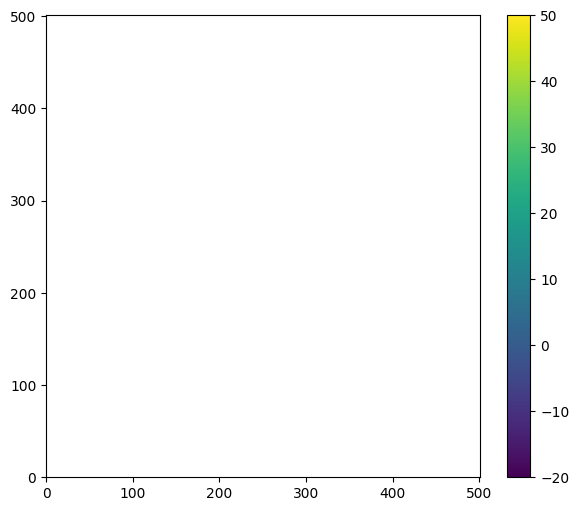

In [14]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(E_co.reshape(501,-1)))*20,vmax = 50, vmin = -20)
plt.colorbar()


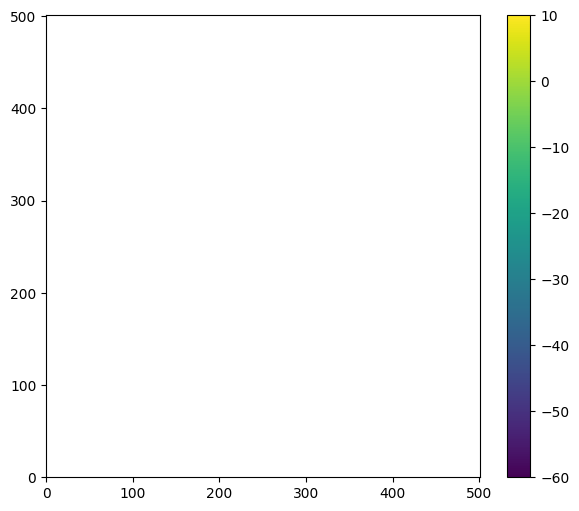

In [15]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(E_cx.reshape(501,-1)))*20,vmax = 50-40, vmin = -20-40)
plt.colorbar()


In [16]:
import h5py as h5
def readh5(fname):
    name = fname.split('.')
    with h5.File(name[0]+'.h5','r') as f:
        co = f['co-polar'][:,:]
        cx = f['cx-polar'][:,:]
        Az = f['Az'][:]
        El = f['El'][:]
    return Az, El, co, cx


In [17]:
Az, El, grasp_co,grasp_cx = readh5('output/_H5/Lens1_POPO_nostop_GaussianBeam_force_farGHz.h5')
#Az, El, grasp_co_2,grasp_cx_2 = readh5('output/_H5/Lens1_POPO_nostop_GaussianBeamGHz.h5')


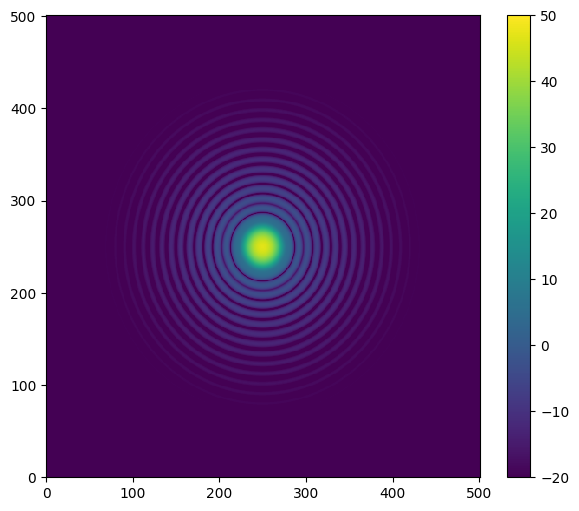

In [18]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(grasp_co.reshape(501,-1)))*20,vmax = 50, vmin = -20)
plt.colorbar()


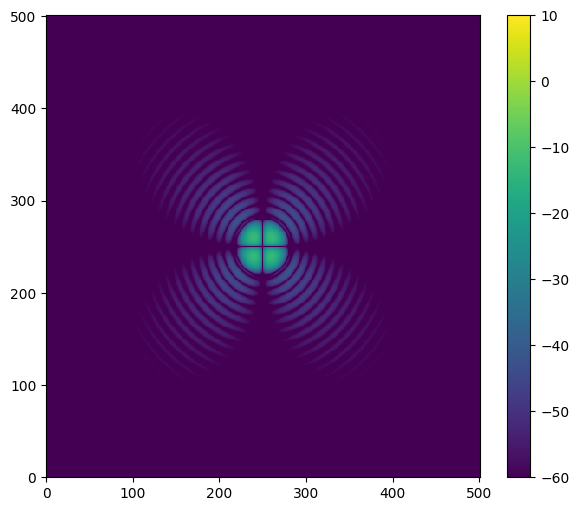

In [19]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(grasp_cx.reshape(501,-1)))*20,vmax = 50-40, vmin = -20-40)
plt.colorbar()


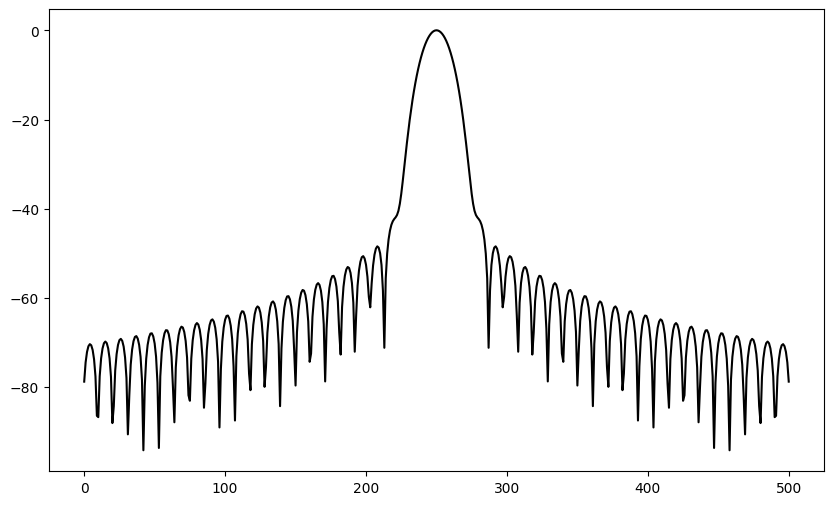

In [20]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:])/np.abs(grasp_co.reshape(501,-1)[250,:]).max())*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])/np.abs(E_co.reshape(501,-1)[250,:]).max())*20,'-')


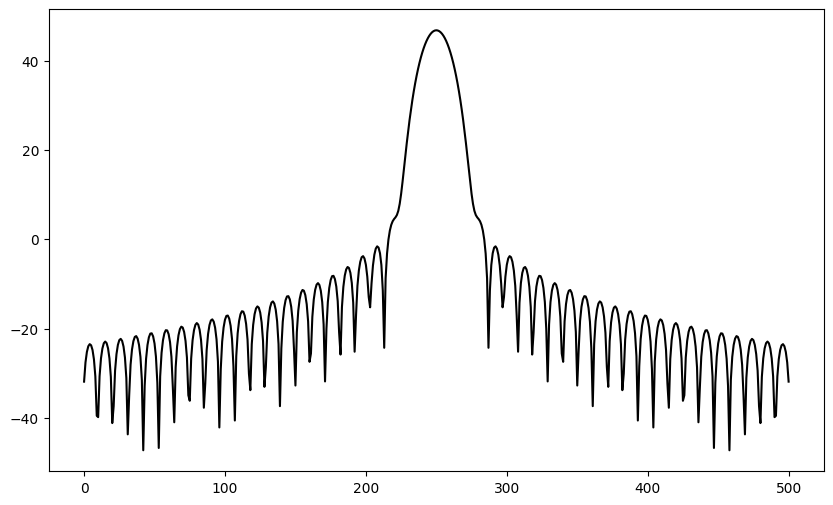

In [21]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:]))*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])**2)*10,'-')


C:\Users\xiaod\AppData\Local\Temp\ipykernel_14200\2035243198.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.angle(E_co.reshape(501,-1)[250,:]/E_co.reshape(501,-1)[250,250]),'-')


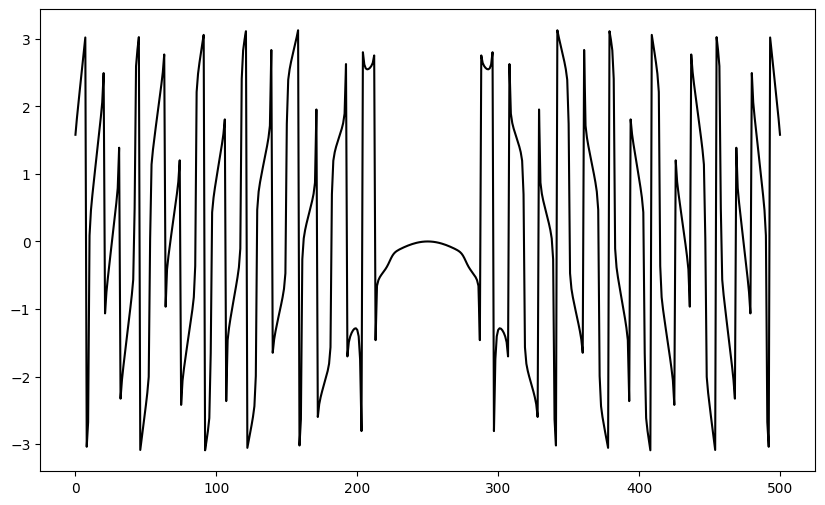

In [22]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.angle(grasp_co.reshape(501,-1)[250,:]/grasp_co.reshape(501,-1)[250,250]),'k-')
plt.plot(np.angle(E_co.reshape(501,-1)[250,:]/E_co.reshape(501,-1)[250,250]),'-')


In [23]:
ratio = np.abs(E_co.reshape(501,-1)[250,:]).max()*np.sqrt(4*np.pi/Z0)/k/np.abs(grasp_co.reshape(501,-1)[250,:]).max()
print(ratio)


nan


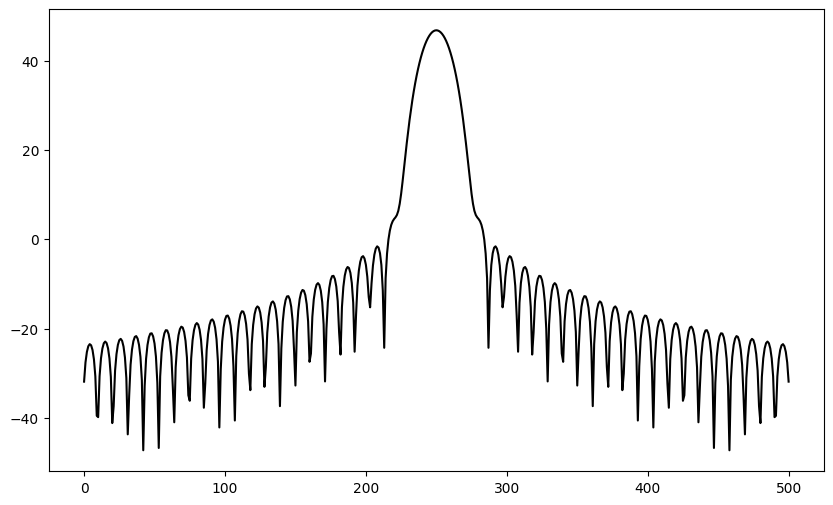

In [24]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:]))*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])**2)*10,'-')


In [25]:
G_co = grasp_co.reshape(501,-1).T/grasp_co.reshape(501,-1)[250,250]
H_co = E_co.reshape(501,-1).T/E_co.reshape(501,-1)[250,250]


C:\Users\xiaod\AppData\Local\Temp\ipykernel_14200\2233053500.py:2: RuntimeWarning: invalid value encountered in true_divide
  H_co = E_co.reshape(501,-1).T/E_co.reshape(501,-1)[250,250]


C:\Users\xiaod\AppData\Local\Temp\ipykernel_14200\3683155368.py:2: RuntimeWarning: invalid value encountered in true_divide
  H_co = E_co.reshape(501,-1)/E_co.reshape(501,-1)[250,250]


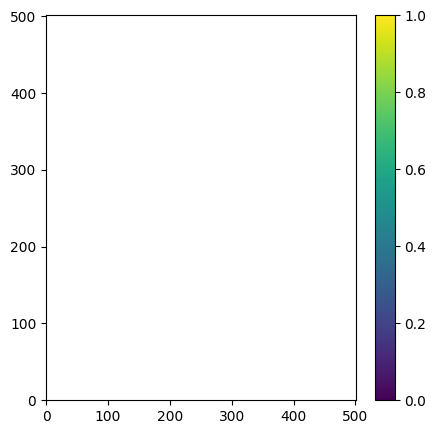

In [26]:
G_co = grasp_co.reshape(501,-1)/grasp_co.reshape(501,-1)[250,250]
H_co = E_co.reshape(501,-1)/E_co.reshape(501,-1)[250,250]
err = H_co-G_co
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err))
plt.colorbar()


C:\Users\xiaod\AppData\Local\Temp\ipykernel_14200\3470031302.py:2: RuntimeWarning: invalid value encountered in true_divide
  H_cx = E_cx.reshape(501,-1)/E_co.reshape(501,-1)[250,250]


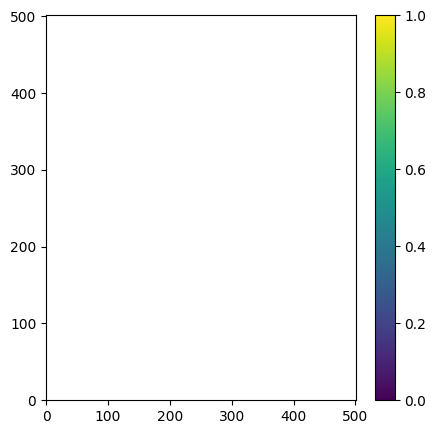

In [27]:
G_cx = grasp_cx.reshape(501,-1)/grasp_co.reshape(501,-1)[250,250]
H_cx = E_cx.reshape(501,-1)/E_co.reshape(501,-1)[250,250]
err = G_cx-H_cx
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err))
plt.colorbar()


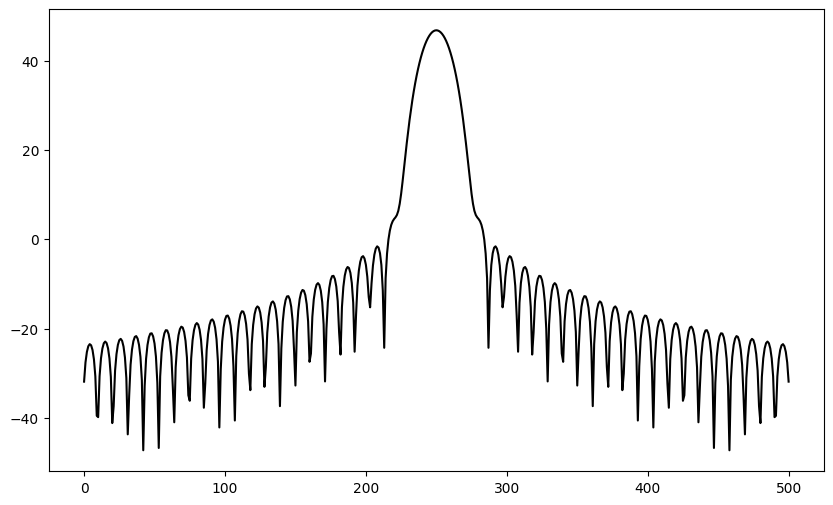

In [28]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:]))*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])**2)*10,'-')


(-80.0, 0.0)

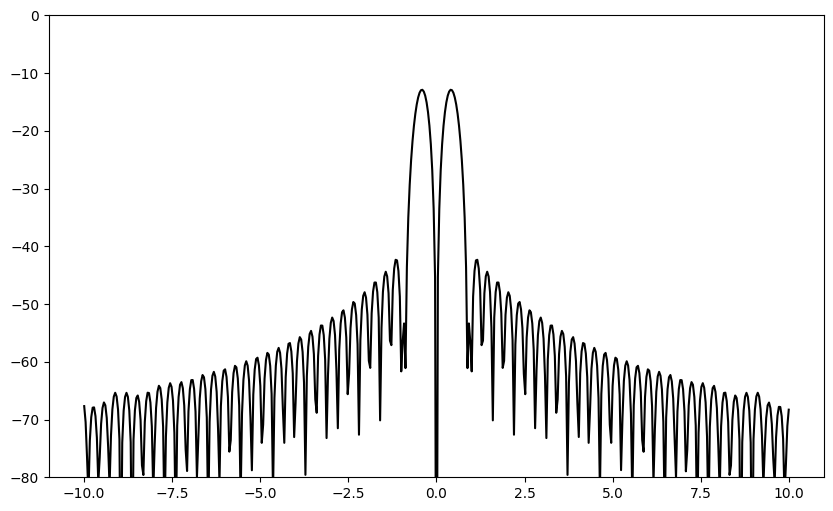

In [29]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(center_grd.x,np.log10(np.abs(np.diagonal(grasp_cx.reshape(501,-1))))*20,'k-')
plt.plot(center_grd.x,np.log10(np.abs(np.diagonal(E_cx.reshape(501,-1).T)))*20,'-')
plt.ylim([-80,0])
#plt.xlim([-5,5])


(-2.0, 2.0)

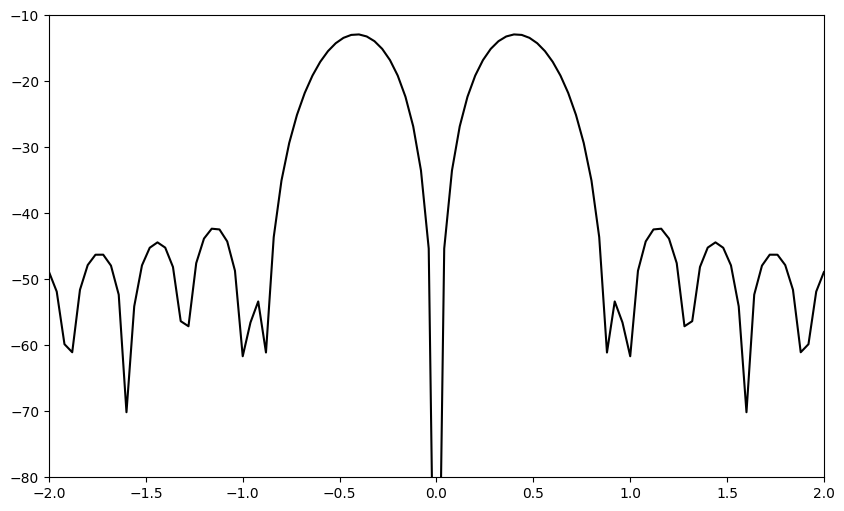

In [30]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(center_grd.x,np.log10(np.abs(np.diagonal(grasp_cx.reshape(501,-1))))*20,'k-')
plt.plot(center_grd.x,np.log10(np.abs(np.diagonal(np.flip(E_cx.reshape(501,-1),axis=-1))))*20,'-')
plt.ylim([-80,-10])
plt.xlim([-2,2])


C:\Users\xiaod\AppData\Local\Temp\ipykernel_14200\2487966221.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(center_grd.x,(np.angle(np.diagonal(E_cx.reshape(501,-1))/E_cx.reshape(501,-1)[241,241])),'-')


(-5.0, 5.0)

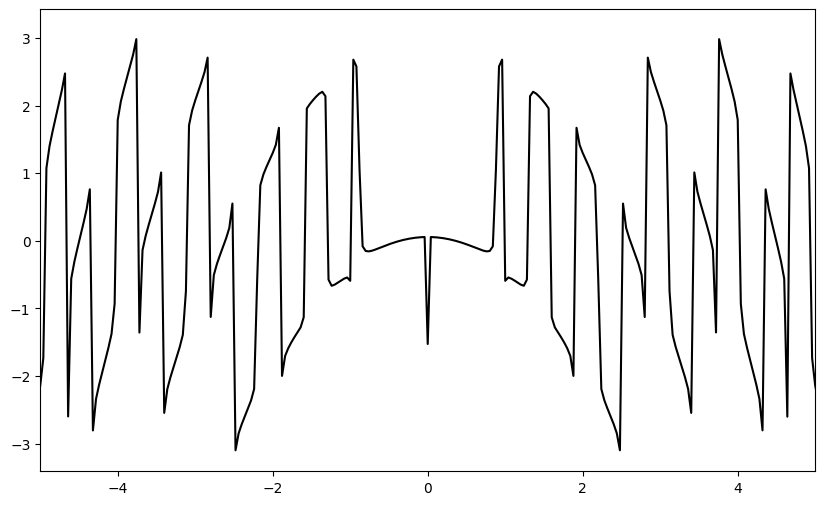

In [31]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(center_grd.x,(np.angle(np.diagonal(grasp_cx.reshape(501,-1))/grasp_cx.reshape(501,-1)[241,241])),'k-')
plt.plot(center_grd.x,(np.angle(np.diagonal(E_cx.reshape(501,-1))/E_cx.reshape(501,-1)[241,241])),'-')

plt.xlim([-5,5])

In [32]:
np.array([10+1j*11])*np.array([10-1j*11])

array([221.+0.j])

In [33]:
np.array([10+1j*21,10+1j*21])*np.array([5,1])

array([50.+105.j, 10. +21.j])